# AIN 214 - PA5 - 2023 on Clustering

This homework aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering, and explore the impact of PCA on these clustering techniques.



# Student Info
## Name Surname: \<Yusuf Emir Cömert\>
## Student ID: \<2220765023\>


## Dataset

We will use the Mall Customer Segmentation Data from Kaggle. The dataset is added to the homework folder - also accessible at [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/).
 

## 1. Data Cleaning

* **Objective**: Prepare your dataset for analysis.
* **Tasks**: Handle missing values, encode categorical features, handle outliers.

The steps for data cleaning may vary. I do not expect you to use a spefisific algorithm to handle outliers for example. But **show your work!**


In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

df = pd.read_csv("Mall_Customers.csv")
missing_values = df.isnull().sum()
missing_values  # There are no missing values.

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
df = df.dropna()
df  # But I will still drop missing data for possible data changes

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df_encoded.head()   # Male represents 1, Female represents 0.


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [22]:
Q1 = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.25) #I specified every column because of "Gender_Male column."
Q3 = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.75)
IQR = Q3 - Q1

df_encoded_no_outliers = df_encoded[~((df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] < (Q1 - 1.5 * IQR)) | (df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df_encoded_no_outliers 
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
193,194,38,113,91,0
194,195,47,120,16,0
195,196,35,120,79,0
196,197,45,126,28,0


## 2. Data Preprocessing

* **Objective**: Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.

In [23]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

min_max_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized.loc[:, numerical_columns] = min_max_scaler.fit_transform(df.loc[:, numerical_columns])
#df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])
df_normalized

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,0.019231,0.000000,0.387755,1
1,2,0.057692,0.000000,0.816327,1
2,3,0.038462,0.009009,0.051020,0
3,4,0.096154,0.009009,0.775510,0
4,5,0.250000,0.018018,0.397959,0
...,...,...,...,...,...
193,194,0.384615,0.882883,0.918367,0
194,195,0.557692,0.945946,0.153061,0
195,196,0.326923,0.945946,0.795918,0
196,197,0.519231,1.000000,0.275510,0


## 3. Dimensionality Reduction

### What is Dimensionality Reduction and Why is it Used?
Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### 3.1. Principal Component Analysis (PCA)
PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance.
**Process:**
* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.





### 3.2. Apply PCA
* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.

**Simply use the PCA from sklearn library**

In [24]:
# df_normalized is already normalized data frame.
df_pca_input = df_normalized[numerical_columns]

pca = PCA(n_components=2)
df_pca_result = pca.fit_transform(df_pca_input)

df_pca = pd.DataFrame(data=df_pca_result, columns=['PC1', 'PC2'])

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

Text(0, 0.5, 'Explained Variance Ratio')

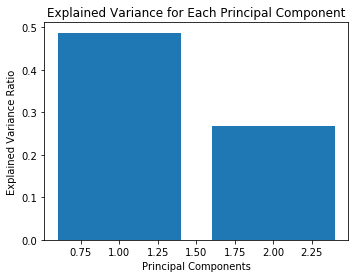

In [40]:
# Plot the Explained Variance
plt.figure(figsize=(12, 4))

# Plot Explained Variance for Each Component
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance for Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

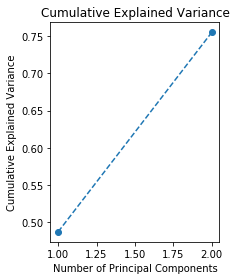

In [44]:
# Plot Cumulative Explained Variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

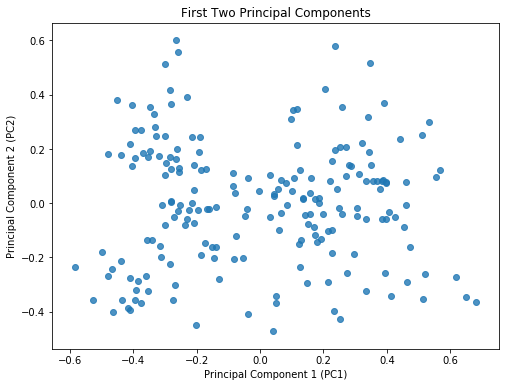

In [37]:
n_components_to_keep = 2  

pca = PCA(n_components=n_components_to_keep)
df_pca_result = pca.fit_transform(df_pca_input)

df_pca = pd.DataFrame(data=df_pca_result, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.8)
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

## 4. Clustering on the Original Dataset

### 4.1. K-Means Clustering on the Original Dataset

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

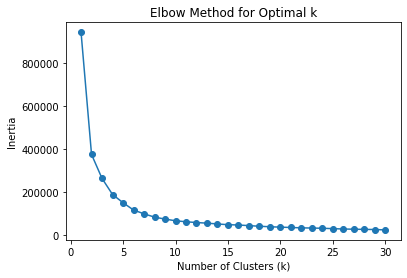

In [33]:
k_values = range(1, 31)  # You can adjust the range based on your data
df_kmeans = df.copy()
df_kmeans = df_kmeans.drop('Gender_Male', axis=1) # since gender is categorical variable. I had to drop it

wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_kmeans)
    wcss.append(kmeans.inertia_)

k_elbow = 4 # We can say that from looking at the graph.
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()


### 4.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset

Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

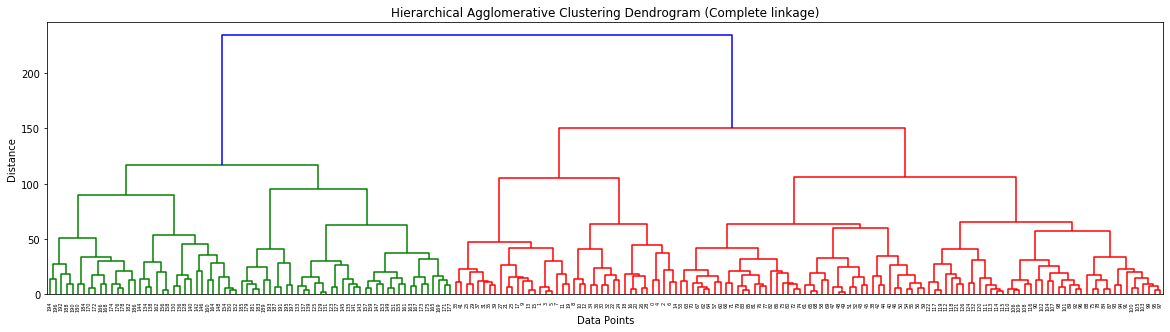

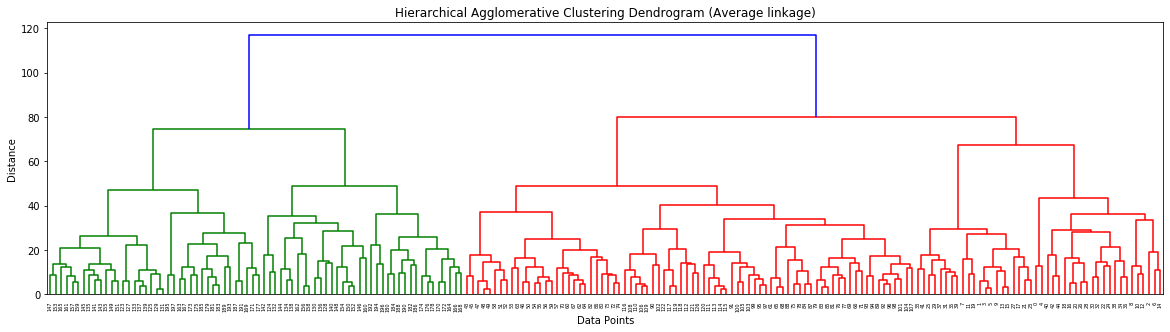

In [29]:
df_hierarchical = df.copy()
df_hierarchical = df_hierarchical.drop('Gender_Male', axis=1)

# Complete linkage
complete = linkage(df_hierarchical, method='complete')

plt.figure(figsize=(20, 5))
dendrogram(complete, labels=df_hierarchical.index)
plt.title('Hierarchical Agglomerative Clustering Dendrogram (Complete linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Average linkage
average = linkage(df_hierarchical, method='average')

plt.figure(figsize=(20, 5))
dendrogram(average, labels=df_hierarchical.index)
plt.title('Hierarchical Agglomerative Clustering Dendrogram (Average linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## 5. K-means Clustering with PCA

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

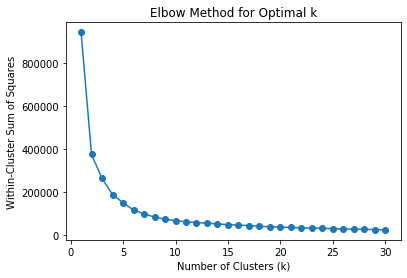

In [30]:
# Since I did apply PCA, I do not have to do it again, so I just plot it.
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

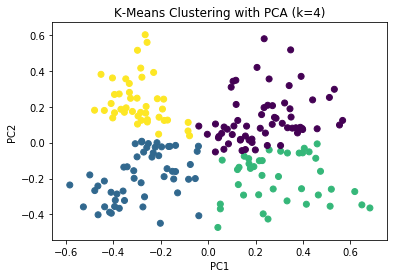

In [41]:
#I chose 2 from looking at the graph above manually.
optimal_k = 4 

kmeans_optimal = KMeans(n_clusters=optimal_k)
df_pca['Cluster'] = kmeans_optimal.fit_predict(df_pca_result)

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('K-Means Clustering with PCA (k=4)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 6. Evaluate the Clustering Results

* Evaluate and compare the clustering results obtained in 4.1 and 5 (k means with and without PCA) using the Silhouette Coefficients.
* Which is better?

In [32]:
kmeans_without_pca = KMeans(n_clusters=optimal_k)
df_kmeans['K-Means'] = kmeans_without_pca.fit_predict(df_kmeans)
sc_without_pca = silhouette_score(df_kmeans.drop('K-Means', axis=1), df_kmeans['K-Means'])

sc_with_pca = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['Cluster'])

print("Silhouette Coefficient without PCA: ", sc_without_pca)
print("Silhouette Coefficient with PCA: ",sc_with_pca)

Silhouette Coefficient without PCA:  0.42469556930257574
Silhouette Coefficient with PCA:  0.3879146466639855


<div style="font-size: large; color: yellow;">
    <ul>
        <li> Higher result indicates better defined clusters. Therefore Silhouette Coefficient without PCA gave higher result.
        <li> You should keep in mind that the difference betweeen with PCA and without PCA are really close to each other, so you may want to consider other sides of the data.
         
        
</div>